In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold
import numpy as np
import seaborn as sns
%matplotlib inline


datafile_train=r"C:\Users\Poonam\Desktop\Python\PD1\Consumer_Complaints_train.csv"
datafile_test=r"C:\Users\Poonam\Desktop\Python\PD1\Consumer_Complaints_test_share.csv"

train=pd.read_csv(datafile_train)
test=pd.read_csv(datafile_test)

train["data"]="train"
test["data"]="test"
test["Consumer disputed?"]=np.nan

t=pd.concat([train,test],axis=0)


In [12]:
t.head()

,Company,Company public response,Company response to consumer,Complaint ID,Consumer complaint narrative,Consumer consent provided?,Consumer disputed?,Issue,Product,State,Sub-issue,Sub-product,Submitted via,ZIP code,data,day_diff,Tags_nan,Tags_Older_American,Tags_Older_American_Servicemember,Timely_response
0,Wells Fargo & Company,NaN,Closed with explanation,856103,NaN,NaN,No,Billing statement,Credit card,MI,NaN,NaN,Web,48342,train,86400000000000,0,1,0,1
1,Santander Bank US,NaN,Closed,1034666,NaN,NaN,No,"Making/receiving payments, sending money",Bank account or service,PA,NaN,(CD) Certificate of deposit,Referral,18042,train,518400000000000,1,0,0,1
2,Equifax,NaN,Closed with non-monetary relief,756363,NaN,NaN,No,Incorrect information on credit report,Credit reporting,CA,Account status,NaN,Referral,92427,train,1814400000000000,1,0,0,1
3,U.S. Bancorp,Company chooses not to provide a public response,Closed with monetary relief,1474177,"My credit card statement from US Bank, XXXX. X...",Consent provided,No,Billing statement,Credit card,GA,NaN,NaN,Web,305XX,train,0,0,1,0,1
4,Bank of America,NaN,Closed with explanation,1132572,NaN,NaN,No,Transaction issue,Credit card,MA,NaN,NaN,Web,2127,train,691200000000000,1,0,0,1


In [5]:
for col in ['Date received','Date sent to company']:
    t[col]=pd.to_datetime(t[col],infer_datetime_format=True)
    
t['day_diff']=pd.to_numeric(t['Date sent to company']-t['Date received'])

for col in ['Date received','Date sent to company']:
    t.drop([col],1,inplace=True)


In [7]:
t['Tags_nan']=np.where(pd.isnull(t['Tags']),1,0)
t['Tags_Older_American']=np.where(t['Tags']=='Older American',1,0)
t['Tags_Older_American_Servicemember']=np.where(t["Tags"]=='Older American, Servicemember',1,0)

In [9]:
t["Timely_response"]=np.where(t["Timely response?"]=="Yes",1,0)
del t["Timely response?"]

In [11]:
del t["Tags"]

In [14]:
t["Company public response"].value_counts()

Company chooses not to provide a public response                                                                           52466
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            32203
Company believes it acted appropriately as authorized by contract or law                                                   20052
Company believes complaint caused principally by actions of third party outside the control or direction of the company     1809
Company believes the complaint is the result of a misunderstanding                                                          1759
Company disputes the facts presented in the complaint                                                                       1736
Company believes complaint is the result of an isolated error                                                               1317
Company can't verify or dispute the facts in the complaint                                       

In [15]:
t["Company public response"].unique()

array([nan, 'Company chooses not to provide a public response',
       'Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'Company believes the complaint is the result of a misunderstanding',
       'Company disputes the facts presented in the complaint',
       "Company can't verify or dispute the facts in the complaint",
       'Company believes complaint is the result of an isolated error',
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       'Company believes complaint relates to a discontinued policy or procedure'],
      dtype=object)

In [21]:
t.dtypes

Company                                           object
Company public response                           object
Company response to consumer                      object
Complaint ID                                       int64
Consumer complaint narrative                      object
Consumer disputed?                                object
Issue                                             object
Product                                           object
State                                             object
Sub-issue                                         object
Sub-product                                       object
Submitted via                                     object
ZIP code                                          object
data                                              object
day_diff                                           int64
Tags_nan                                           int32
Tags_Older_American                                int32
Tags_Older_American_Servicememb

In [19]:
t["Consumer consent provided?"].unique()

array([nan, 'Consent provided', 'Other', 'Consent not provided',
       'Consent withdrawn'], dtype=object)

In [20]:
t["Consumer_consent_provided_nan"]=np.where(t["Consumer consent provided?"]=="nan",1,0)
t["Consumer_consent_provided_consent_provided"]=np.where(t["Consumer consent provided?"]=="Consent provided",1,0)
t["Consumer_consent_provided_Other"]=np.where(t["Consumer consent provided?"]=="Other",1,0)
t["Consumer_consent_provided_Consent_not_provided"]=np.where(t["Consumer consent provided?"]=="Consent not provided",1,0)
del t["Consumer consent provided?"]

In [31]:
del t["Company response to consumer"]

In [25]:
a=pd.get_dummies(t["Company response to consumer"],prefix="Company_response_to_consumer",drop_first=True)

In [28]:
a.head()

,Company_response_to_consumer_Closed with explanation,Company_response_to_consumer_Closed with monetary relief,Company_response_to_consumer_Closed with non-monetary relief,Company_response_to_consumer_Closed with relief,Company_response_to_consumer_Closed without relief,Company_response_to_consumer_Untimely response
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [29]:
t=pd.concat([t,a],axis=1)

In [34]:
t.head()

,Company,Company public response,Complaint ID,Consumer complaint narrative,Issue,Product,State,Sub-issue,Sub-product,Submitted via,...,Consumer_consent_provided_consent_provided,Consumer_consent_provided_Other,Consumer_consent_provided_Consent_not_provided,Company_response_to_consumer_Closed with explanation,Company_response_to_consumer_Closed with monetary relief,Company_response_to_consumer_Closed with non-monetary relief,Company_response_to_consumer_Closed with relief,Company_response_to_consumer_Closed without relief,Company_response_to_consumer_Untimely response,Consumer_disputed
0,Wells Fargo & Company,NaN,856103,NaN,Billing statement,Credit card,MI,NaN,NaN,Web,...,0,0,0,1,0,0,0,0,0,0
1,Santander Bank US,NaN,1034666,NaN,"Making/receiving payments, sending money",Bank account or service,PA,NaN,(CD) Certificate of deposit,Referral,...,0,0,0,0,0,0,0,0,0,0
2,Equifax,NaN,756363,NaN,Incorrect information on credit report,Credit reporting,CA,Account status,NaN,Referral,...,0,0,0,0,0,1,0,0,0,0
3,U.S. Bancorp,Company chooses not to provide a public response,1474177,"My credit card statement from US Bank, XXXX. X...",Billing statement,Credit card,GA,NaN,NaN,Web,...,1,0,0,0,1,0,0,0,0,0
4,Bank of America,NaN,1132572,NaN,Transaction issue,Credit card,MA,NaN,NaN,Web,...,0,0,0,1,0,0,0,0,0,0


In [33]:
t["Consumer_disputed"]=np.where(t["Consumer disputed?"]=="Yes",1,0)
del t["Consumer disputed?"]

In [36]:
t["Product"].value_counts()

Mortgage                   195079
Debt collection            108047
Credit reporting           101612
Credit card                 71613
Bank account or service     68094
Consumer Loan               23263
Student loan                18635
Money transfers              4176
Payday loan                  4048
Prepaid card                 2813
Other financial service       635
Virtual currency               12
Name: Product, dtype: int64

In [41]:
b=pd.get_dummies(t["Product"],prefix="Product",drop_first=True)
b
t=pd.concat([t,b],axis=1)
del t["Product"]

In [63]:
t.head()

,Company public response,Consumer complaint narrative,Sub-issue,Sub-product,data,day_diff,Tags_nan,Tags_Older_American,Tags_Older_American_Servicemember,Timely_response,...,State_MD,State_OH,State_NC,State_MI,State_AZ,State_WA,State_MA,State_CO,State_TN,State_MO
0,NaN,NaN,NaN,NaN,train,86400000000000,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,NaN,NaN,NaN,(CD) Certificate of deposit,train,518400000000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,Account status,NaN,train,1814400000000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Company chooses not to provide a public response,"My credit card statement from US Bank, XXXX. X...",NaN,NaN,train,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,train,691200000000000,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [43]:
c=pd.get_dummies(t["Submitted via"],prefix="Submitted_via",drop_first=True)
t=pd.concat([t,c],axis=1)
del t["Submitted via"]

In [47]:
del t['ZIP code']
del t['Company']

In [51]:
del t["Complaint ID"]

In [59]:
k=t['Issue'].value_counts()
for val in k.axes[0][0:14]:
    varname='Issue_'+val.replace(',','_').replace(' ','_')
    t[varname]=np.where(t['Issue']==val,1,0)
    
del t['Issue']


In [70]:
t.dtypes

data                                                            object
day_diff                                                         int64
Tags_nan                                                         int32
Tags_Older_American                                              int32
Tags_Older_American_Servicemember                                int32
Timely_response                                                  int32
Consumer_consent_provided_nan                                    int32
Consumer_consent_provided_consent_provided                       int32
Consumer_consent_provided_Other                                  int32
Consumer_consent_provided_Consent_not_provided                   int32
Company_response_to_consumer_Closed with explanation             uint8
Company_response_to_consumer_Closed with monetary relief         uint8
Company_response_to_consumer_Closed with non-monetary relief     uint8
Company_response_to_consumer_Closed with relief                  uint8
Compan

In [62]:
k=t['State'].value_counts()
for val in k.axes[0][0:19]:
    varname='State_'+val.replace(',','_').replace(' ','_')
    t[varname]=np.where(t['State']==val,1,0)
    
del t['State']

In [67]:
t["Sub_product_nan"]=np.where(t["Sub-product"]=="nan",1,0)
del t["Sub-product"]

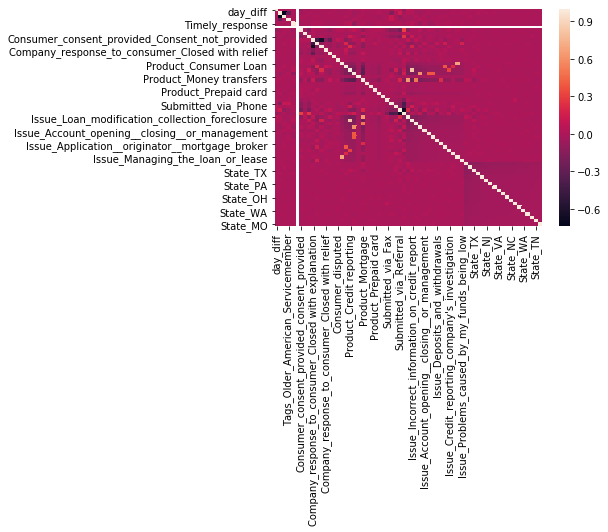

In [66]:
sns.heatmap(t.corr())

In [69]:
for col in ['Sub-issue','Consumer complaint narrative',
            'Company public response']:
    varname=col.replace('-','_').replace('?','').replace(" ",'_')+'_isNan'
    t[varname]=np.where(pd.isnull(t[col]),1,0)
    t.drop([col],1,inplace=True)

In [71]:
training=t[t['data']=='train']
del training['data']
testing=t[t['data']=='test']
testing.drop(['Consumer_disputed','data'],axis=1,inplace=True)

In [72]:
training.shape,testing.shape

((478421, 69), (119606, 68))

In [73]:
training_x=training.drop(["Consumer_disputed"],axis=1)
training_y=training["Consumer_disputed"]

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


clf = ExtraTreesClassifier(random_state=123)
clf = clf.fit(training_x, training_y)

model = SelectFromModel(clf, prefit=True)
train_x = pd.DataFrame(model.transform(training_x))

train_x=pd.DataFrame(train_x)
train_x.head()

,0,1,2,3,4,5,6
0,86400000000000,0,1,1,0,1,1
1,518400000000000,1,0,0,0,0,1
2,1814400000000000,1,0,0,1,0,1
3,0,0,1,0,0,1,0
4,691200000000000,1,0,1,0,1,1


In [78]:
sorted(zip(clf.feature_importances_, training_x.columns), reverse=True)

[(0.5503028814783874, 'day_diff'),
 (0.0263477834938503, 'Company_public_response_isNan'),
 (0.022158871068904268,
  'Company_response_to_consumer_Closed with explanation'),
 (0.021677421031935658, 'Tags_nan'),
 (0.016004219301003323, 'Tags_Older_American'),
 (0.015925192539484205,
  'Company_response_to_consumer_Closed with non-monetary relief'),
 (0.015369035473394712, 'Submitted_via_Web'),
 (0.013954858087689492,
  'Company_response_to_consumer_Closed with monetary relief'),
 (0.012830615295630336, 'Timely_response'),
 (0.011082833660841191, 'State_CA'),
 (0.011003692757617619, 'State_FL'),
 (0.009665526508612457, 'State_NY'),
 (0.00943342747513869, 'Consumer_consent_provided_Consent_not_provided'),
 (0.00938012484229966, 'State_TX'),
 (0.008606557268507571, 'Tags_Older_American_Servicemember'),
 (0.008222147432855771, 'State_GA'),
 (0.008035298266786492, 'State_VA'),
 (0.007944365789740265, 'State_NJ'),
 (0.007922530503222428, 'State_PA'),
 (0.007864078771370435, 'State_IL'),
 (0.0

In [79]:
test_new=pd.DataFrame(model.transform(testing))

test_new.head()

,0,1,2,3,4,5,6
0,-86400000000000,1,0,1,0,1,1
1,0,1,0,1,0,1,1
2,86400000000000,1,0,0,0,1,1
3,432000000000000,0,1,0,1,0,0
4,0,1,0,1,0,1,1


In [80]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=123)
model.fit(train_x,training_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [82]:
pred=model.predict(test_new)

In [85]:
import collections

collections.Counter(pred)

Counter({0: 119525, 1: 81})

In [86]:
submission=pd.DataFrame(list(zip(test['Complaint ID'],list(pred))),
                       columns=['Complaint ID','Consumer disputed?'])

In [88]:
submission["Consumer disputed?"]=np.where(submission["Consumer disputed?"]==1,"Yes","No")

In [89]:
submission

,Complaint ID,Consumer disputed?
0,675956,No
1,1858795,No
2,32637,No
3,1731374,No
4,501487,No
5,631565,No
6,1283963,No
7,1902970,No
8,1160691,No
9,359929,No


In [90]:
submission.to_csv('Poonam_Prajapati_P1_part2.csv',index=False)